# Diabetes Prediction - Binary Classification with PyTorch

I'm going to use a small diabetes dataset as a toy dataset for binary classification application with PyTorch. It has 520 entries and 17 features.

In [63]:
import torch
from torch import nn

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [65]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [66]:
df.shape

(520, 17)

## 1. Label Encoding for Numerical Features and Target Encoding for 'class' (target feature)

In [31]:
label_encoder = LabelEncoder()

# List of columns to encode (excluding 'age' and the target feature 'class')
columns_to_encode = [col for col in df.columns if col not in ['age', 'class']]

# Apply label encoding to each column in the list
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [32]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Positive' else 0)

In [33]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## 2. Scaling of Age feature

In [34]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.673217,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.859575,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.588061,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.247441,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1.029885,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


How many features of each class is there?

In [35]:
label_counts = df['class'].value_counts()
label_counts

,count
class,
1,320
0,200


This is a slightly imbalanced dataset with about 60% of labels attributed to the positive class. I won't take any measures against this imbalance for now.

<ipython-input-36-467837ed37f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")


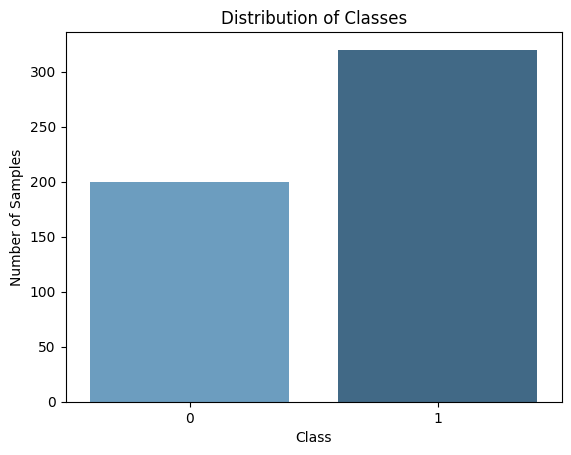

In [36]:
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes')
plt.show()

In [37]:
X = df.drop('class', axis=1)
y = df['class']

In [38]:
X.shape, y.shape

((520, 16), (520,))

In [39]:
X_sample = X.iloc[[0]].values  # 2D array with one sample
y_sample = y.iloc[0]
X_sample, y_sample

(array([[-0.67321655,  1.        ,  0.        ,  1.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
          1.        ]]),
 1)

In [40]:
# Convert X and y to tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=102)

I use cpu bevause the dataset is too small, it will suffice.

In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

The class below could be as well written as nn.Sequential(), but I'll stick to this option for the project. The artchitecture is very simple - 3 linear layers and ReLU.

In [43]:
class BinaryModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=16, out_features=32)
    self.layer2 = nn.Linear(in_features=32, out_features=64)
    self.layer3 = nn.Linear(in_features=64, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
        x = self.relu(self.layer1(x))  # Apply ReLU to the output of layer1
        x = self.relu(self.layer2(x))  # Apply ReLU to the output of layer2
        x = self.layer3(x)  # Output layer without ReLU
        return x

In [44]:
X_train.shape

torch.Size([416, 16])

In [45]:
model = BinaryModel().to(device)
print(model)

BinaryModel(
  (layer1): Linear(in_features=16, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)


As a loss function, I use BCEWithLogitsLoss. It combines a sigmoid layer with binary cross-entropy loss, making it both efficient and numerically stable.

As an optimiser, I use SGD with a learning rate of 0.1.

In [46]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer =  torch.optim.SGD(model.parameters(), lr=0.1)

Since PyTorch doesn't have an accuracy function, I use a custom one.

In [47]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) *100
  return acc

I chose 100 epochs only; y_logits is the raw output from the model =>
torch.sigmoid(y_logits) converts logits to probabilities =>
torch.round() then converts probabilities to binary predictions (0 or 1)

In [62]:
torch.manual_seed(102)
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # forward pass
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # calculate loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model(X_test).squeeze()
    #test_pred = torch.round(torch.sigmoid(y_logits))
    test_pred = torch.round(torch.sigmoid(test_logits))
    # calculate loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_train,
                          y_pred = y_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.13574, Accuracy: 95.67 | Test Loss: 0.19992 | Test Accuracy: 95.67
Epoch: 10 | Loss: 0.13363, Accuracy: 95.91 | Test Loss: 0.19966 | Test Accuracy: 95.91
Epoch: 20 | Loss: 0.13163, Accuracy: 95.67 | Test Loss: 0.19927 | Test Accuracy: 95.67
Epoch: 30 | Loss: 0.12969, Accuracy: 95.67 | Test Loss: 0.19898 | Test Accuracy: 95.67
Epoch: 40 | Loss: 0.12779, Accuracy: 95.91 | Test Loss: 0.19854 | Test Accuracy: 95.91
Epoch: 50 | Loss: 0.12595, Accuracy: 95.91 | Test Loss: 0.19812 | Test Accuracy: 95.91
Epoch: 60 | Loss: 0.12419, Accuracy: 95.91 | Test Loss: 0.19763 | Test Accuracy: 95.91
Epoch: 70 | Loss: 0.12238, Accuracy: 95.91 | Test Loss: 0.19698 | Test Accuracy: 95.91
Epoch: 80 | Loss: 0.12056, Accuracy: 95.91 | Test Loss: 0.19633 | Test Accuracy: 95.91
Epoch: 90 | Loss: 0.11881, Accuracy: 95.91 | Test Loss: 0.19578 | Test Accuracy: 95.91


In [69]:
# make predictions
model.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()


y_pred[:10], y[:10]

(tensor([1., 0., 0., 0., 0., 1., 1., 1., 1., 1.], grad_fn=<SliceBackward0>),
 0    1
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: class, dtype: int64)

The final accuracy is 95.91 which is a good result is itself. It could be improved further with, for example,

*   SGD being replaced by Adam
*   changing the architecture of the model.

